In [6]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
# Function to sample without replacement ensuring unique group numbers
def sample_unique_groups(group, n_samples=5):
    # Create a copy to safely add a new column without affecting the original DataFrame
    temp_group = group.copy()
    
    # Extract group numbers
    temp_group['group_num'] = temp_group['filename'].apply(lambda x: x.split('_')[0])
    
    # Drop duplicates to ensure one sample per group
    unique_groups = temp_group.drop_duplicates('group_num')
    
    # Sample groups
    if len(unique_groups) < n_samples:
        raise ValueError("Not enough unique groups available to sample.")
    return unique_groups.sample(n=n_samples)



# Load the data
data = pd.read_csv('/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/free_fluid_labels.csv', usecols=['filename', 'free_fluid_label'])

In [9]:
# Separate data into two groups based on 'free_fluid_label'
group_minus_one = data[data['free_fluid_label'] == -1]
group_one = data[data['free_fluid_label'] == 1]

In [10]:
# Sample 5 images from each group ensuring unique group numbers
sampled_minus_one = sample_unique_groups(group_minus_one)
sampled_one = sample_unique_groups(group_one)
# Concatenate the samples from both groups
final_sample = pd.concat([sampled_minus_one, sampled_one])

# Display the sampled data
print(final_sample)


                                              filename  free_fluid_label  \
594  1.2.840.114340.3.8251050064157.3.20190421.1148...                -1   
339  1.2.840.114340.3.48100021226225.3.20190816.202...                -1   
657  1.2.840.114340.3.8251050064157.3.20180802.1506...                -1   
628  1.2.840.114340.3.8251050064157.3.20180425.1456...                -1   
209  1.2.840.114340.3.48100016190144.3.20200705.200...                -1   
1    1.2.840.114340.3.8251017179172.3.20141207.2290...                 1   
14   1.2.840.114340.3.8251017179172.3.20150128.1647...                 1   
29   1.2.840.114340.3.8251017179172.3.20140531.2340...                 1   
675  1.2.840.114340.3.48100016190144.3.20201005.183...                 1   
27   1.2.840.114340.3.8251017179172.3.20150413.1830...                 1   

                                             group_num  
594  1.2.840.114340.3.8251050064157.3.20190421.1148...  
339  1.2.840.114340.3.48100021226225.3.20190816.2

In [11]:
vis_images = list(zip(final_sample['filename'], final_sample['free_fluid_label']))
vis_images

[('1.2.840.114340.3.8251050064157.3.20190421.114851.4961.6_137.jpg', -1),
 ('1.2.840.114340.3.48100021226225.3.20190816.202201.6283.4_39.jpg', -1),
 ('1.2.840.114340.3.8251050064157.3.20180802.150631.1897.6_152.jpg', -1),
 ('1.2.840.114340.3.8251050064157.3.20180425.145653.384.6_0.jpg', -1),
 ('1.2.840.114340.3.48100016190144.3.20200705.200229.5904.4_0.jpg', -1),
 ('1.2.840.114340.3.8251017179172.3.20141207.22903.11967.6_5.jpg', 1),
 ('1.2.840.114340.3.8251017179172.3.20150128.164707.13073.6_79.jpg', 1),
 ('1.2.840.114340.3.8251017179172.3.20140531.234055.7585.6_41.jpg', 1),
 ('1.2.840.114340.3.48100016190144.3.20201005.183539.6271.4_0.jpg', 1),
 ('1.2.840.114340.3.8251017179172.3.20150413.183009.15018.6_53.jpg', 1)]

In [12]:
vis_images = [
    ('1.2.840.114340.3.8251050064157.3.20190421.114851.4961.6_137.jpg', -1),
    ('1.2.840.114340.3.48100021226225.3.20190816.202201.6283.4_39.jpg', -1),
    ('1.2.840.114340.3.8251050064157.3.20180802.150631.1897.6_152.jpg', -1),
    ('1.2.840.114340.3.8251050064157.3.20180425.145653.384.6_0.jpg', -1),
    ('1.2.840.114340.3.48100016190144.3.20200705.200229.5904.4_0.jpg', -1),
    ('1.2.840.114340.3.8251017179172.3.20141207.22903.11967.6_5.jpg', 1),
    ('1.2.840.114340.3.8251017179172.3.20150128.164707.13073.6_79.jpg', 1),
    ('1.2.840.114340.3.8251017179172.3.20140531.234055.7585.6_41.jpg', 1),
    ('1.2.840.114340.3.48100016190144.3.20201005.183539.6271.4_0.jpg', 1),
    ('1.2.840.114340.3.8251017179172.3.20150413.183009.15018.6_53.jpg', 1)
]

Image name: 1.2.840.114340.3.8251050064157.3.20190421.114851.4961.6_137.jpg
FF label: -1


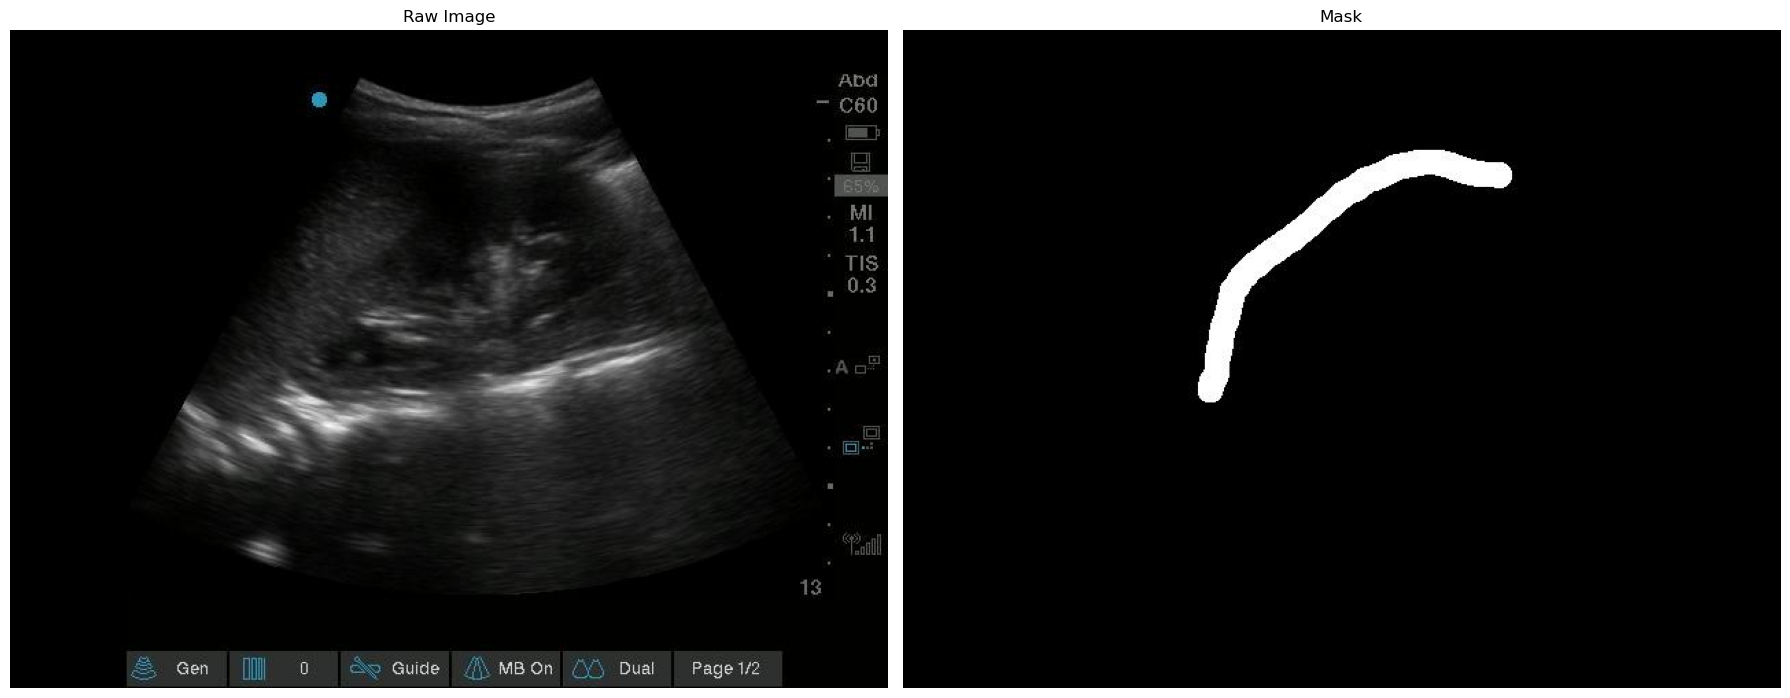

Image name: 1.2.840.114340.3.48100021226225.3.20190816.202201.6283.4_39.jpg
FF label: -1


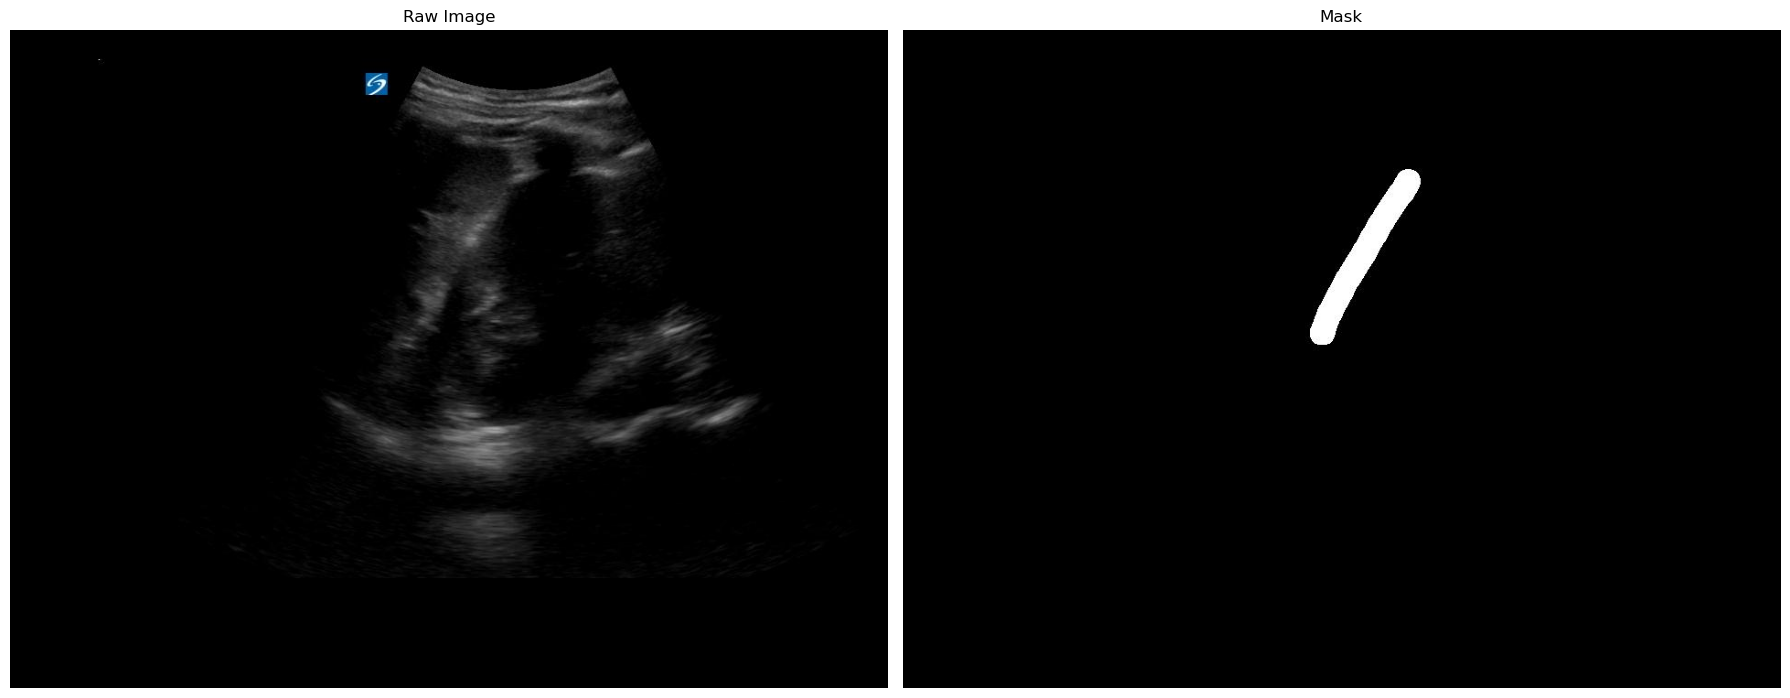

Image name: 1.2.840.114340.3.8251050064157.3.20180802.150631.1897.6_152.jpg
FF label: -1


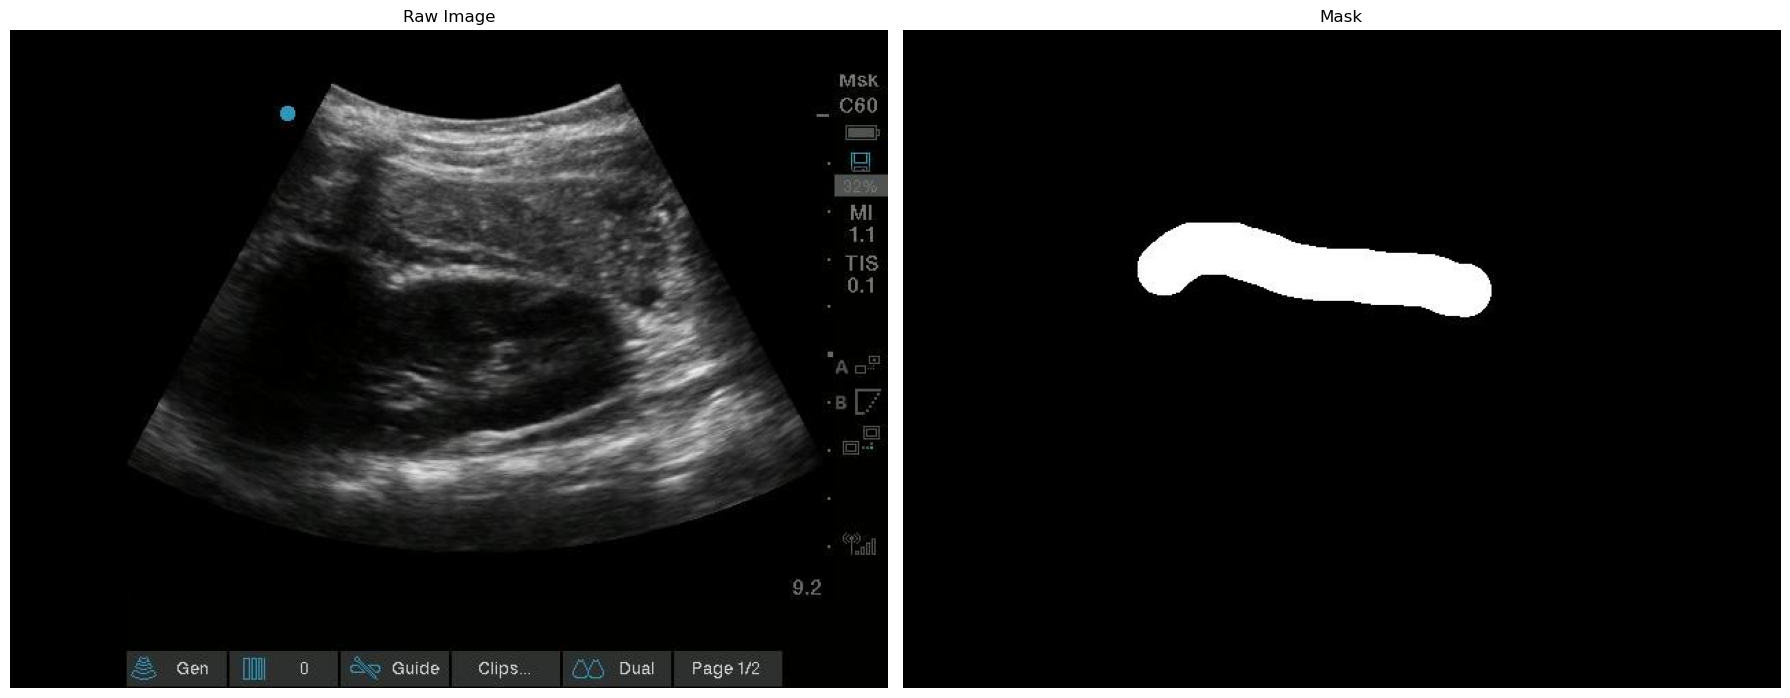

Image name: 1.2.840.114340.3.8251050064157.3.20180425.145653.384.6_0.jpg
FF label: -1


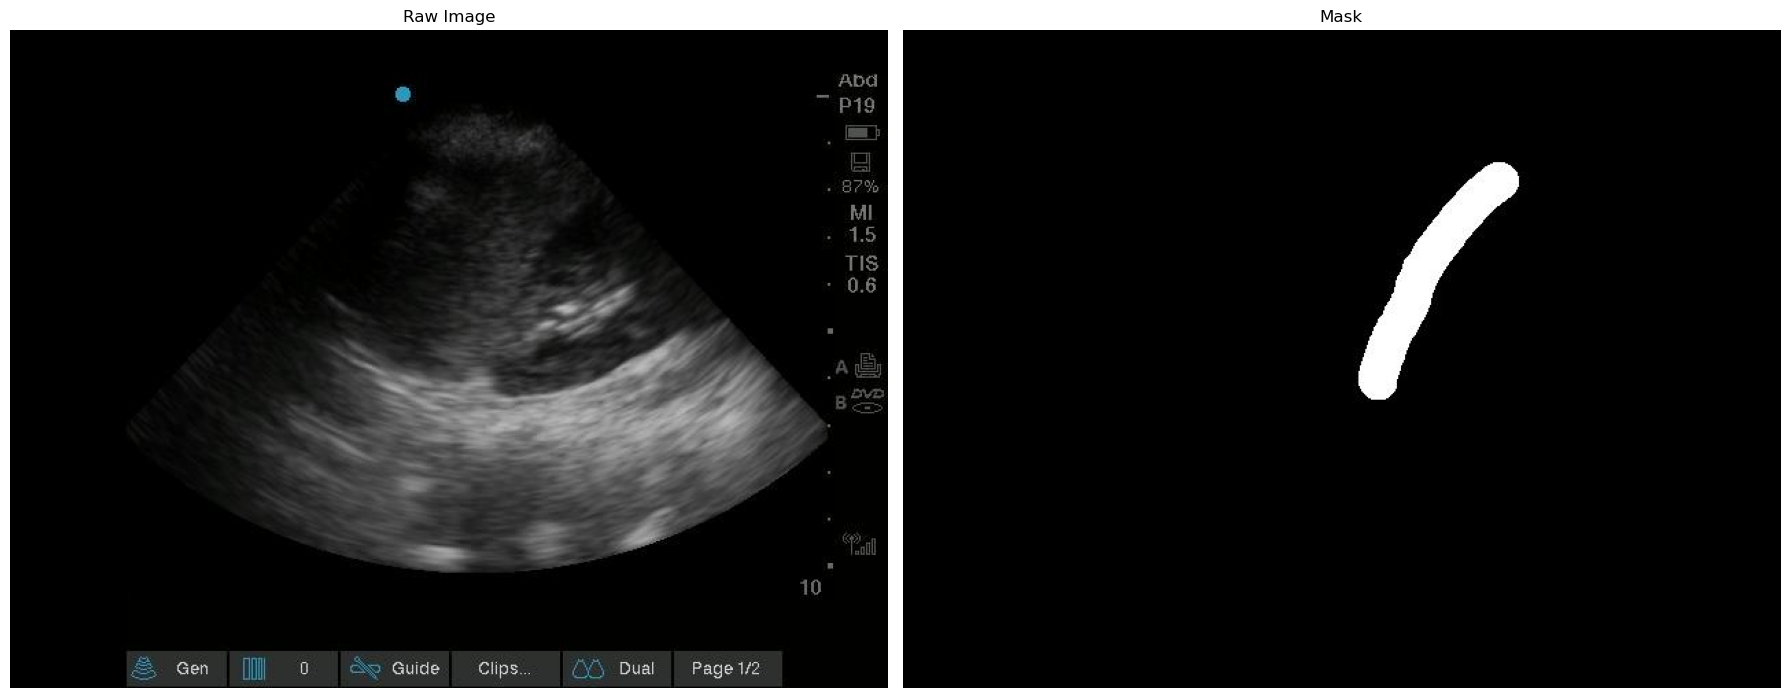

Image name: 1.2.840.114340.3.48100016190144.3.20200705.200229.5904.4_0.jpg
FF label: -1


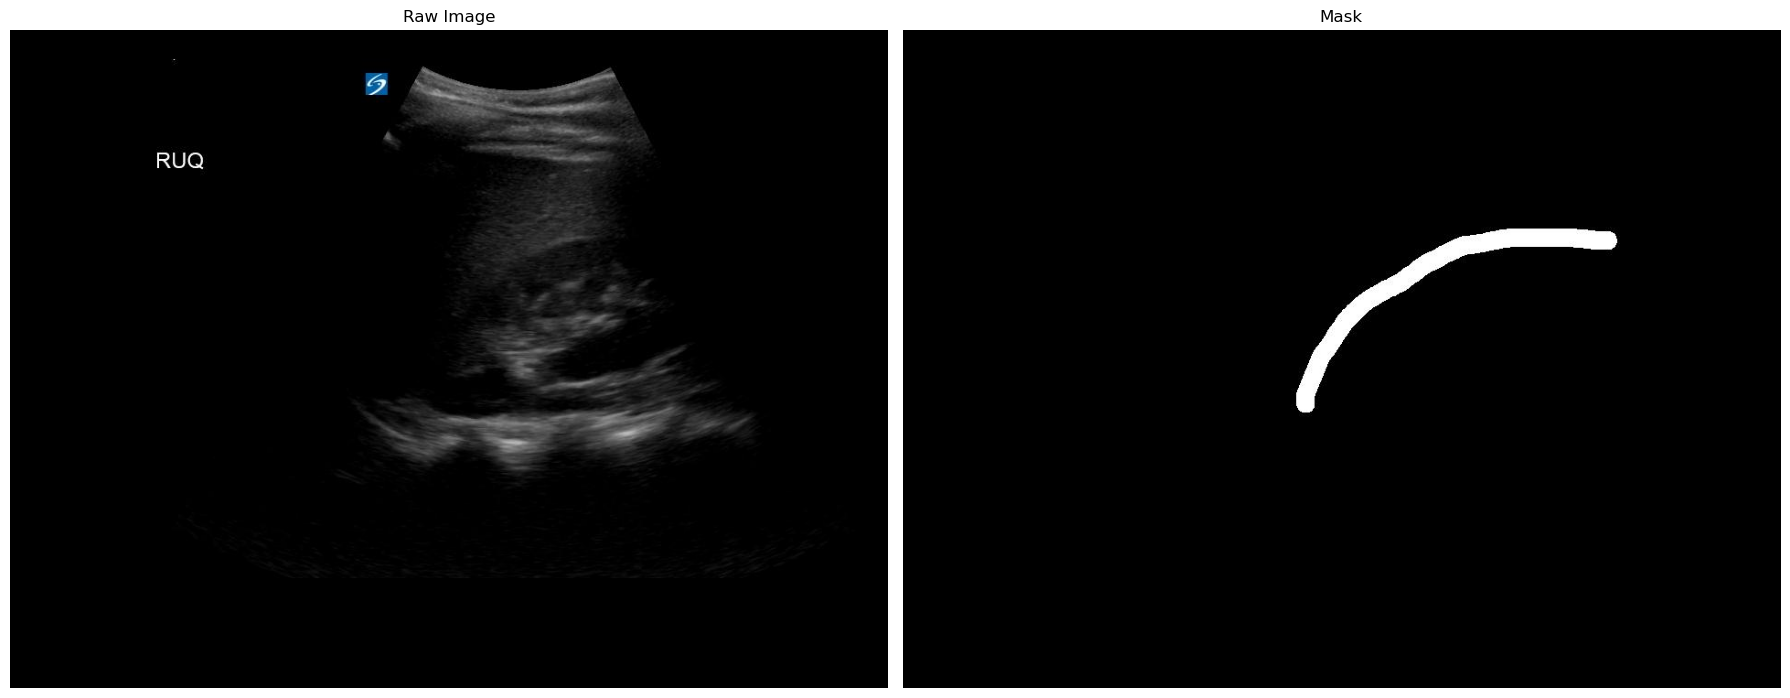

Image name: 1.2.840.114340.3.8251017179172.3.20141207.22903.11967.6_5.jpg
FF label: 1


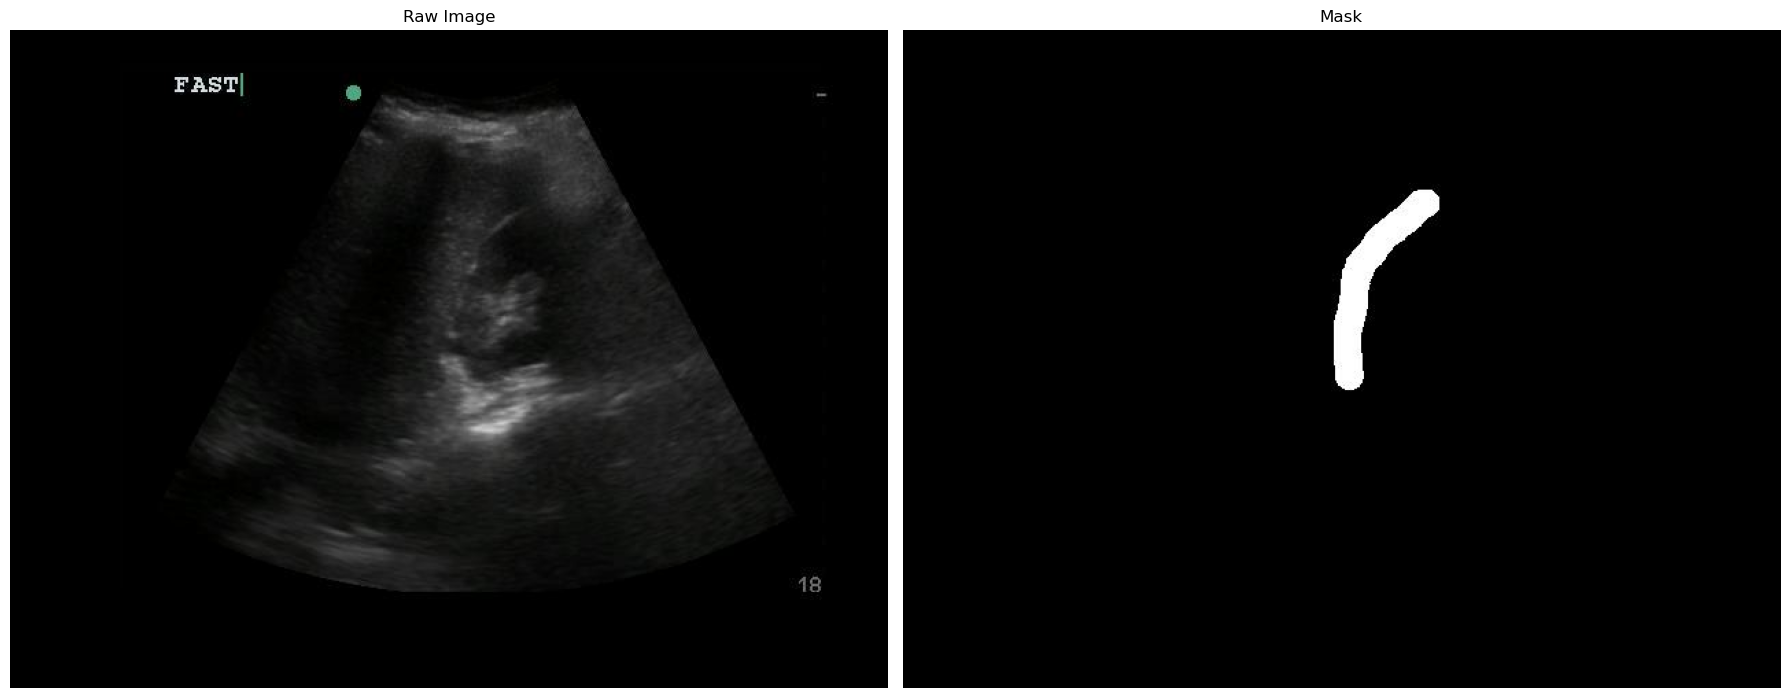

Image name: 1.2.840.114340.3.8251017179172.3.20150128.164707.13073.6_79.jpg
FF label: 1


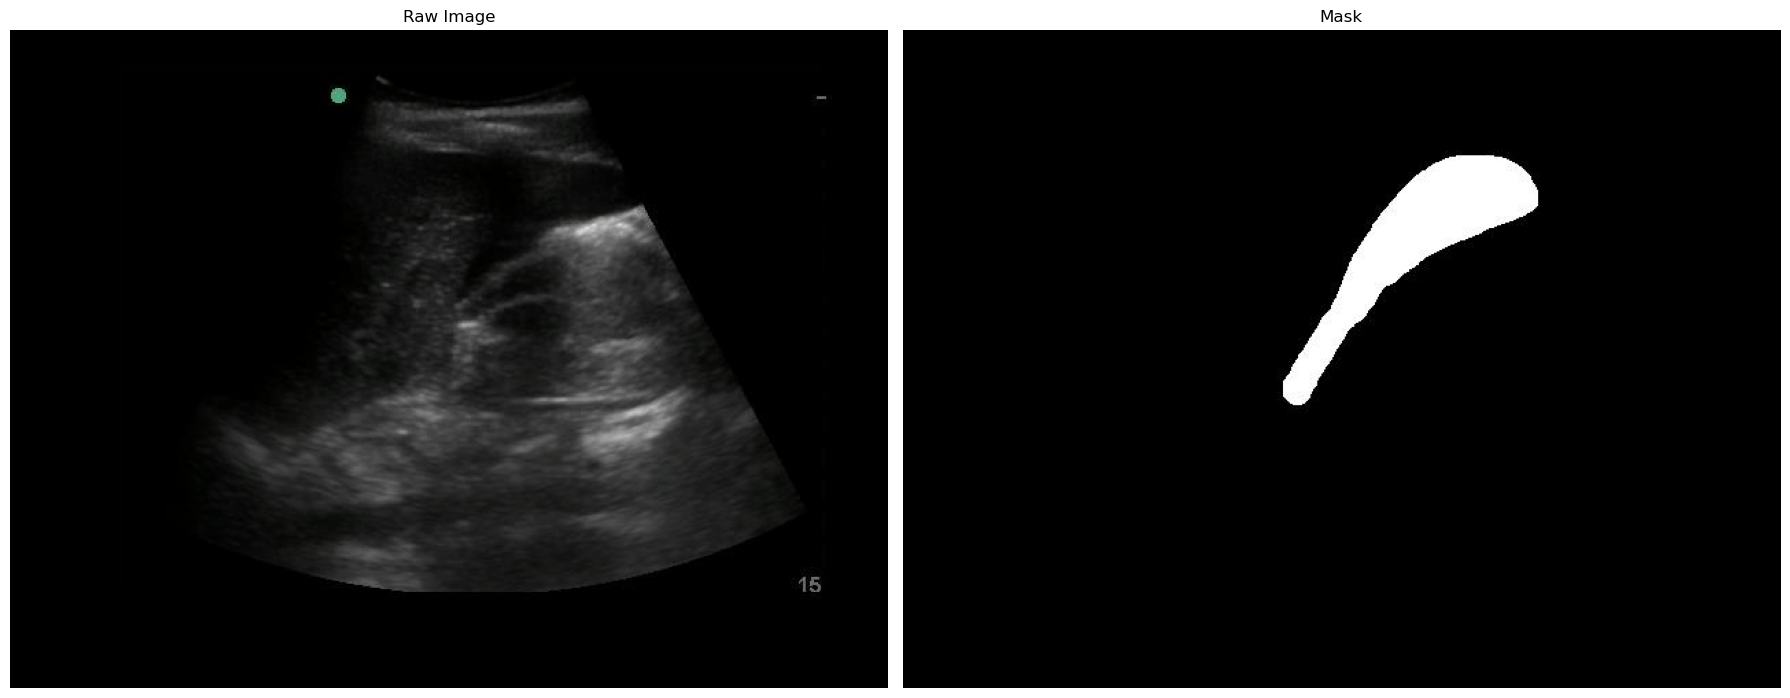

Image name: 1.2.840.114340.3.8251017179172.3.20140531.234055.7585.6_41.jpg
FF label: 1


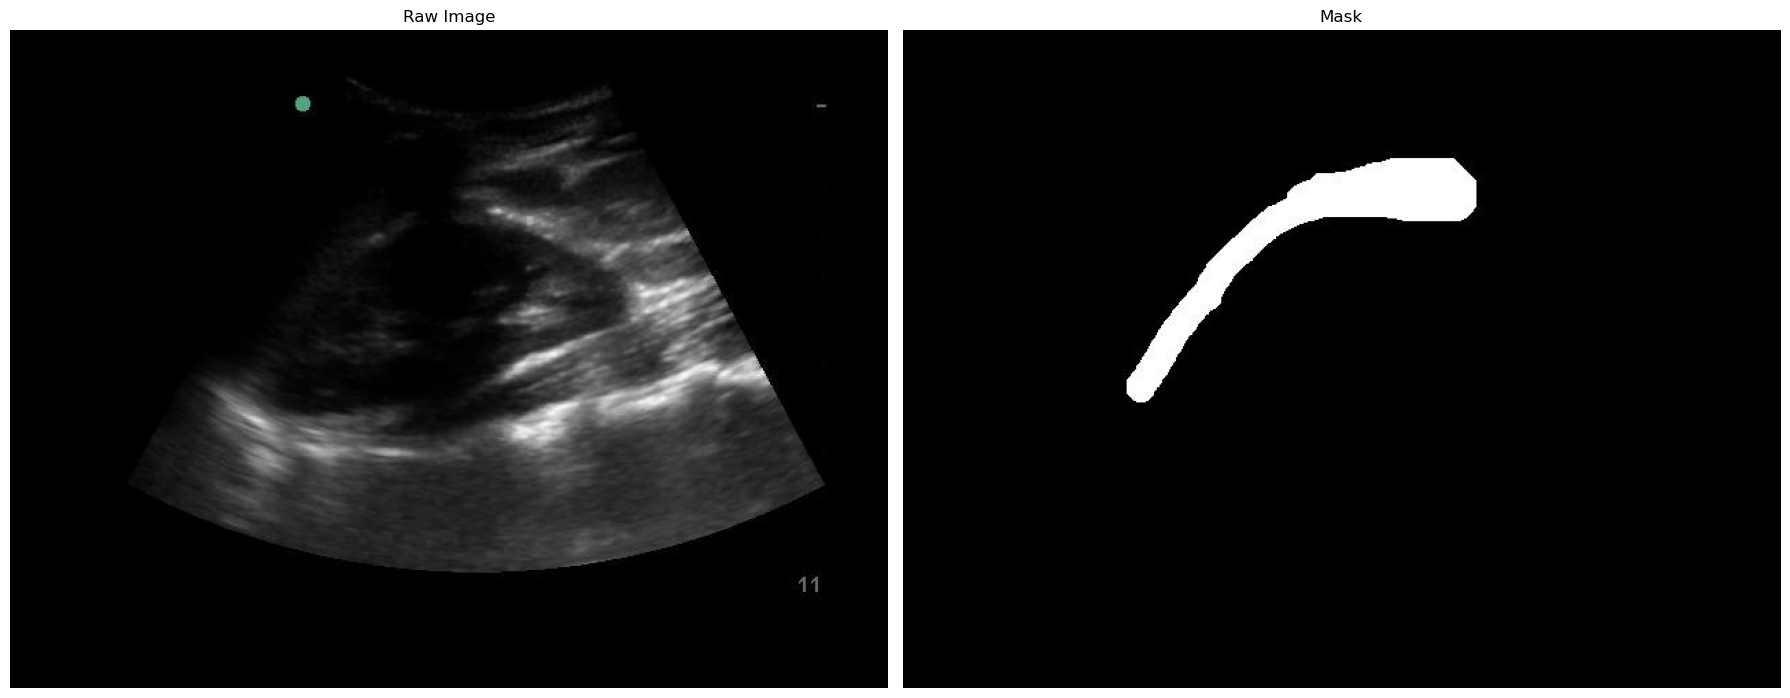

Image name: 1.2.840.114340.3.48100016190144.3.20201005.183539.6271.4_0.jpg
FF label: 1


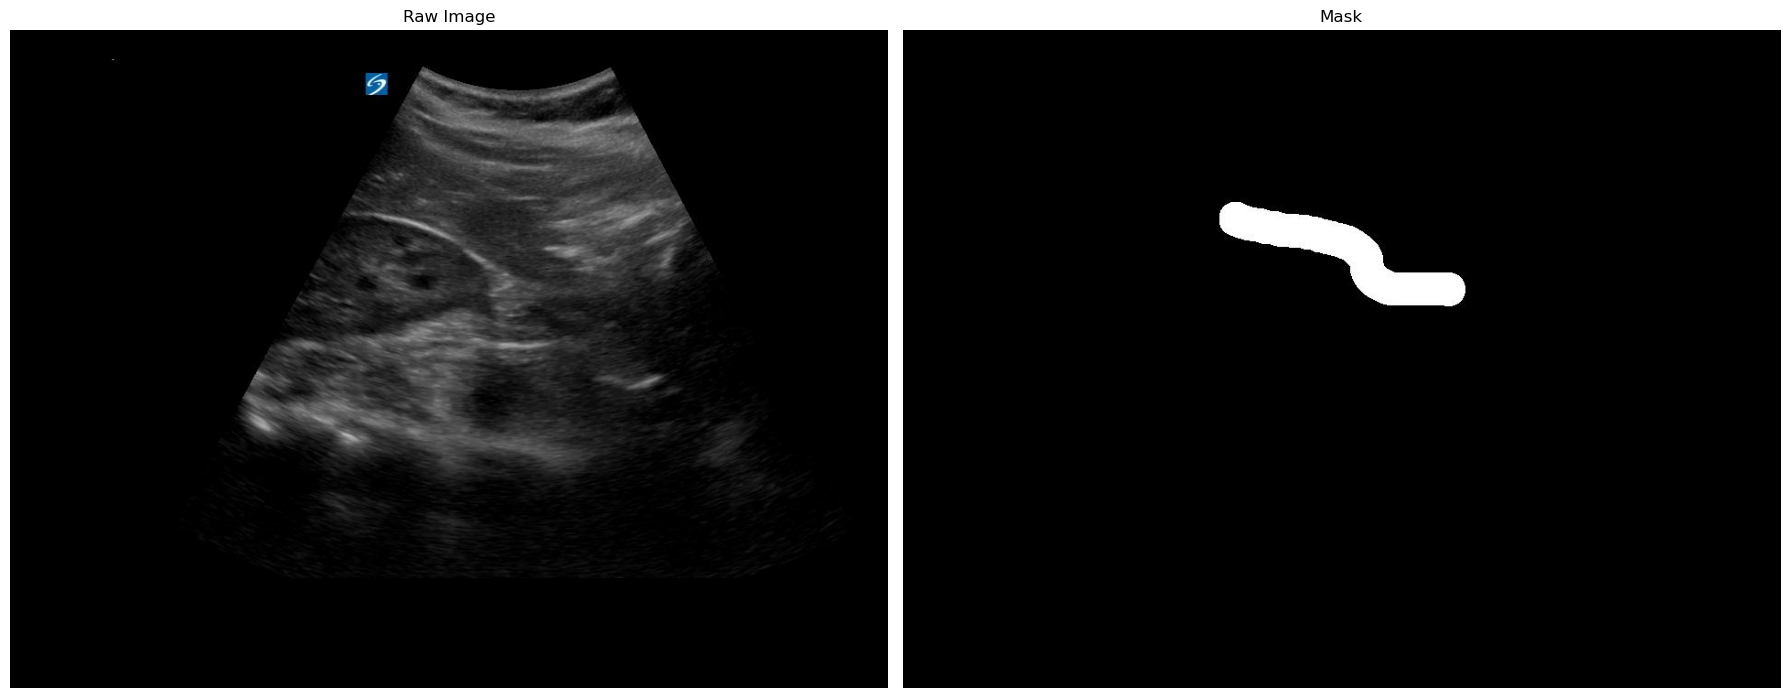

Image name: 1.2.840.114340.3.8251017179172.3.20150413.183009.15018.6_53.jpg
FF label: 1


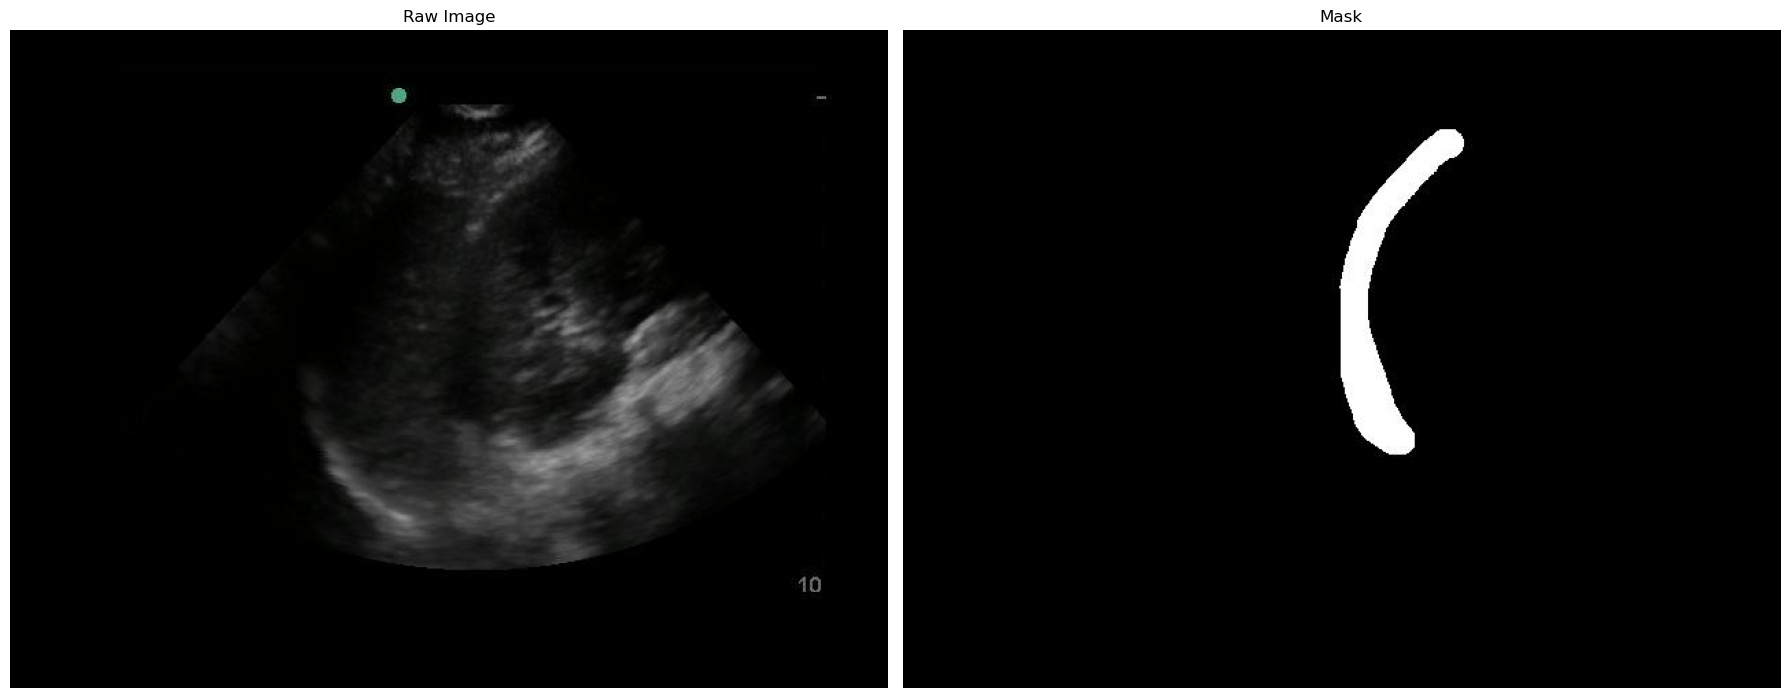

In [13]:
image_dir = '/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/raw_images'
mask_dir = '/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/masks'

for idx in range(len(vis_images)):
    image_fname = vis_images[idx][0]
    mask_fname = image_fname.rsplit('.jpg')[0] + '_Mask.jpg'
    
    image = Image.open(os.path.join(image_dir, image_fname))
    mask = Image.open(os.path.join(mask_dir, mask_fname))
    
    print(f'Image name: {image_fname}')
    print(f'FF label: {vis_images[idx][1]}')
    
    # Set the figure size (adjust width and height as needed)
    fig, ax = plt.subplots(1, 2, figsize=(18, 9))
    
    # Display the raw image
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Raw Image')
    ax[0].axis('off')
    
    # Display the mask image
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Mask')
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.show()